In [34]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing data
glass_data = pd.read_csv('/home/suraj/Downloads/Assignments/Assignment-13/glass.csv')
glass_data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [4]:
glass_data.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [5]:
glass_data.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

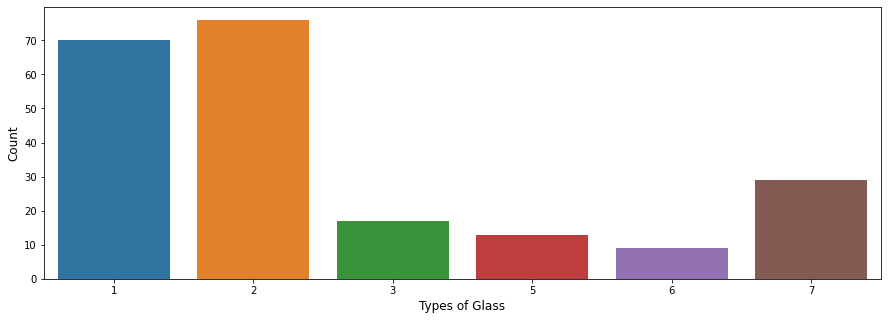

In [44]:
plt.figure(figsize=(15, 5))
    
sns.countplot(data=glass_data, x="Type")
plt.xlabel("Types of Glass", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

In [29]:
# model building
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
X = glass_data.iloc[:,:9]
y = glass_data.iloc[:,-1:]

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state= 12,stratify=y)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((171, 9), (171, 1), (43, 9), (43, 1))

In [35]:
## Model Training | Testing | Evaluation without NORMALIZATION
### Generating a Model with K = 3,5,7

knn_model1 = KNeighborsClassifier(n_neighbors=3)
knn_model1.fit(X_train,y_train)
y_pred = knn_model1.predict(X_test)
print("Accuracy score: ", round(accuracy_score(y_test,y_pred),4))

Accuracy score:  0.6977


In [36]:
knn_model2 = KNeighborsClassifier(n_neighbors=5)
knn_model2.fit(X_train,y_train)
y_pred = knn_model2.predict(X_test)
print("Accuracy score: ", round(accuracy_score(y_test,y_pred),4))

Accuracy score:  0.6279


In [38]:
knn_model3 = KNeighborsClassifier(n_neighbors=7)
knn_model3.fit(X_train,y_train)
y_pred = knn_model3.predict(X_test)
print("Accuracy score: ", round(accuracy_score(y_test,y_pred),4))

Accuracy score:  0.6279


In [45]:
## Model Training | Testing | Evaluation with NORMALIZATION
from sklearn.preprocessing import StandardScaler

In [46]:
scaler   = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [47]:
X_train,X_test,y_train,y_test = train_test_split(scaled_X,y,test_size=0.20,random_state= 12,stratify=y)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((171, 9), (171, 1), (43, 9), (43, 1))

In [48]:
knn_model4 = KNeighborsClassifier(n_neighbors=3)
knn_model4.fit(X_train,y_train)
y_pred = knn_model4.predict(X_test)
print("Accuracy score: ", round(accuracy_score(y_test,y_pred),4))

Accuracy score:  0.7674


In [49]:
knn_model5 = KNeighborsClassifier(n_neighbors=5)
knn_model5.fit(X_train,y_train)
y_pred = knn_model5.predict(X_test)
print("Accuracy score: ", round(accuracy_score(y_test,y_pred),4))

Accuracy score:  0.6512


In [64]:
# selection of best k value
from sklearn.model_selection import GridSearchCV, cross_val_score

n_neighbours = np.array(range(1,50))
param_grid = dict(n_neighbours=np.array(range(1,50)))

In [61]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid={'n_neighbors':range(1,20),'weights':['uniform', 'distance']})
grid.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 20),
                         'weights': ['uniform', 'distance']})

In [62]:
grid.best_params_, grid.best_score_

({'n_neighbors': 3, 'weights': 'uniform'}, 0.6779831932773109)

In [65]:
neighbours = list(range(1,50,2))
cv_scores = []

for i in neighbours:
    #print(i)
    knn_model = KNeighborsClassifier(n_neighbors = i)
    cv_score = cross_val_score(estimator = knn_model,X=scaled_X,y=y,cv=10)
    #print(i,'-',cv_score.mean())
    cv_scores.append(cv_score.mean())

In [68]:
cv_scores

[0.6582251082251082,
 0.691125541125541,
 0.6632034632034632,
 0.6257575757575757,
 0.620995670995671,
 0.6162337662337661,
 0.6023809523809524,
 0.5928571428571429,
 0.5837662337662338,
 0.5932900432900434,
 0.5844155844155845,
 0.5655844155844155,
 0.5796536796536796,
 0.583982683982684,
 0.5794372294372295,
 0.5701298701298702,
 0.5608225108225107,
 0.5885281385281386,
 0.5837662337662337,
 0.579004329004329,
 0.5841991341991342,
 0.5837662337662336,
 0.5837662337662338,
 0.5701298701298702,
 0.5517316017316017]

In [70]:
neighbours[cv_scores.index(max(cv_scores))], max(cv_scores)

(3, 0.691125541125541)

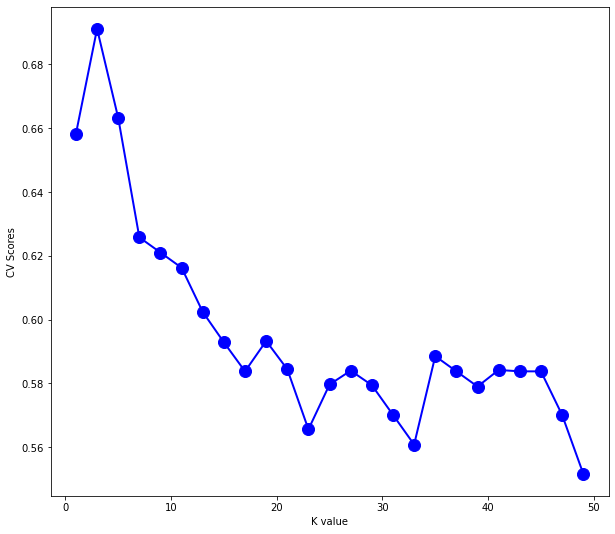

In [91]:
### Vizualizing the K neighbours wrt CV
plt.figure(figsize=(10,9))
plt.plot(neighbours,cv_scores,color='blue',marker= 'o',linewidth=2, markersize=12)
plt.xlabel('K value')
plt.ylabel('CV Scores')
plt.show()

### Rebuild the Model by choosing 3 as the neighrest neighbour

In [97]:
knn_final_model = KNeighborsClassifier(n_neighbors=3)
knn_final_model.fit(X_train,y_train)
y_pred = knn_final_model.predict(X_test)
print("Accuracy score: ", round(accuracy_score(y_test,y_pred),4))

Accuracy score:  0.7674
